<a href="https://colab.research.google.com/github/abhinavbhandar/supplychain/blob/main/Sales_Forecast_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

#Read Data

In [ ]:
df=pd.read_csv('/content/month sale.csv',index_col='Date',parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()

Shape of data (36, 1)


,Sum of Sales
Date,
2015-01-01,1051590.06
2015-02-01,927009.88
2015-03-01,1051253.67
2015-04-01,1014463.26
2015-05-01,1050478.42


In [ ]:
df.columns=["Sales"]
df.head()

,Sales
Date,
2015-01-01,1051590.06
2015-02-01,927009.88
2015-03-01,1051253.67
2015-04-01,1014463.26
2015-05-01,1050478.42


#Plot Your Data

<Axes: xlabel='Date'>

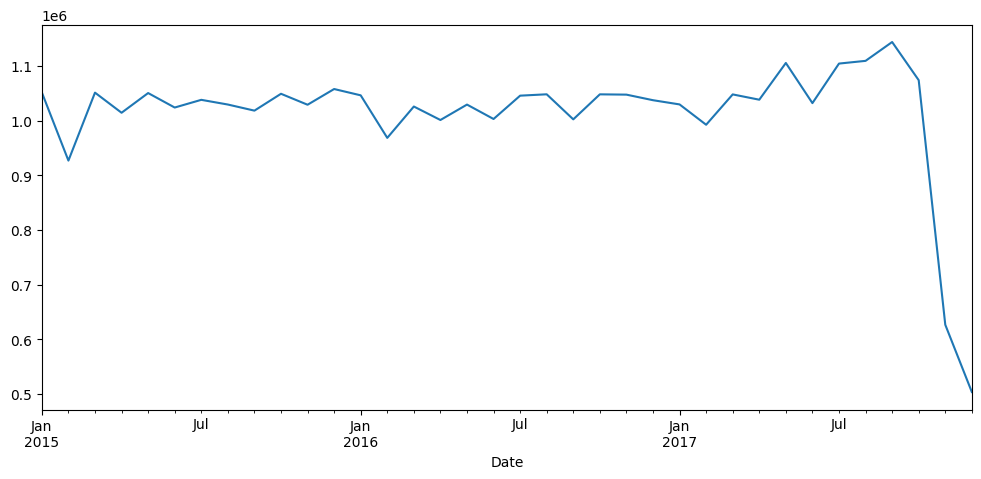

In [ ]:
df['Sales'].plot(figsize=(12,5))

#Check For Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [ ]:
adf_test(df['Sales'])

1. ADF :  -3.7796546435661558
2. P-Value :  0.0031224702327139835
3. Num Of Lags :  5
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 30
5. Critical Values :
	 1% :  -3.6699197407407405
	 5% :  -2.9640707407407407
	 10% :  -2.621171111111111


#Figure Out Order for ARIMA Model

In [ ]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(df['Sales'],trace=True,
                          suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=945.731, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=932.018, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=932.160, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1100.250, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=927.826, Time=0.81 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=941.687, Time=1.46 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=947.670, Time=0.58 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=931.099, Time=0.09 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=933.291, Time=1.41 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.15 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 6.203 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -459.913
Date:                Wed, 04 Dec 2024   AIC                            927.826
Time:                        12:16:20   BIC                            934.161
Sample:                    01-01-2015   HQIC                           930.037
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8.279e+05   2.71e+05      3.057      0.002    2.97e+05    1.36e+06
ar.L1          0.9027      0.135      6.700      0.000       0.639       1.167
ar.L2         -0.7131      0.249     -2.865      0.004      -1.201      -0.225
sigma2      7.168e+09     45.429   1.58e+08      0.000    7.17e+09    7.17e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                89.51
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               4.16   Skew:                            -1.90
Prob(H) (two-sided):                  0.02   Kurtosis:                         9.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.61e+23. Standard errors may be unstable.
"""

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

#Split Data into Training and Testing

In [ ]:
print(df.shape)
train=df.iloc[:-5]
test=df.iloc[-5:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(36, 1)
(31, 1) (5, 1)
Sales    1109337.15
Name: 2017-08-01 00:00:00, dtype: float64 Sales    503910.81
Name: 2017-12-01 00:00:00, dtype: float64


## Train the Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Sales'],order=(2,0,0))
model=model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   31
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -365.145
Date:                Wed, 04 Dec 2024   AIC                            738.290
Time:                        12:16:20   BIC                            744.026
Sample:                    01-01-2015   HQIC                           740.160
                         - 07-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.032e+06   7252.061    142.318      0.000    1.02e+06    1.05e+06
ar.L1         -0.1337      0.311     -0.430      0.667      -0.743       0.475
ar.L2          0.4512      0.115      3.937      0.000       0.227       0.676
sigma2      6.758e+08      0.075   9.05e+09      0.000    6.76e+08    6.76e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 8.97
Prob(Q):                              0.80   Prob(JB):                         0.01
Heteroskedasticity (H):               0.98   Skew:                            -0.96
Prob(H) (two-sided):                  0.97   Kurtosis:                         4.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.12e+25. Standard errors may be unstable.
"""

#Make Predictions on Test Set

<Axes: xlabel='Date'>

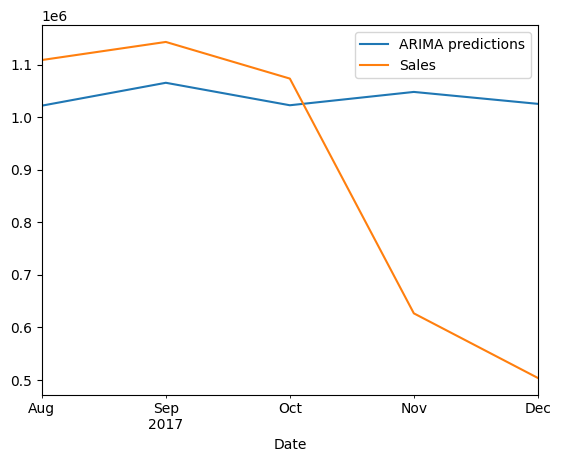

In [ ]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)
test['Sales'].plot(legend=True)


In [ ]:
test['Sales'].mean()

891586.316

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Sales']))
print(rmse)


305432.5731678166


In [ ]:
model2=ARIMA(df['Sales'],order=(2,0,0))
model2=model2.fit()
df.tail()

,Sales
Date,
2017-08-01,1109337.15
2017-09-01,1143775.09
2017-10-01,1073994.16
2017-11-01,626914.37
2017-12-01,503910.81


#For Future Dates

In [ ]:
index_future_dates=pd.date_range(start='2017-12-01', periods=13, freq='MS')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+12,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2017-12-01    7.724645e+05
2018-01-01    1.100841e+06
2018-02-01    1.243764e+06
2018-03-01    1.175428e+06
2018-04-01    1.022970e+06
2018-05-01    9.218327e+05
2018-06-01    9.208643e+05
2018-07-01    9.823808e+05
2018-08-01    1.040807e+06
2018-09-01    1.057759e+06
2018-10-01    1.037631e+06
2018-11-01    1.008246e+06
2018-12-01    9.930472e+05
Freq: MS, Name: ARIMA Predictions, dtype: float64


In [ ]:
# Suppress scientific notation for pandas
pd.options.display.float_format = '{:.2f}'.format
print(pred)


2017-12-01    772464.54
2018-01-01   1100840.82
2018-02-01   1243764.17
2018-03-01   1175428.14
2018-04-01   1022969.82
2018-05-01    921832.71
2018-06-01    920864.28
2018-07-01    982380.79
2018-08-01   1040806.79
2018-09-01   1057758.73
2018-10-01   1037630.85
2018-11-01   1008246.17
2018-12-01    993047.21
Freq: MS, Name: ARIMA Predictions, dtype: float64


<Axes: >

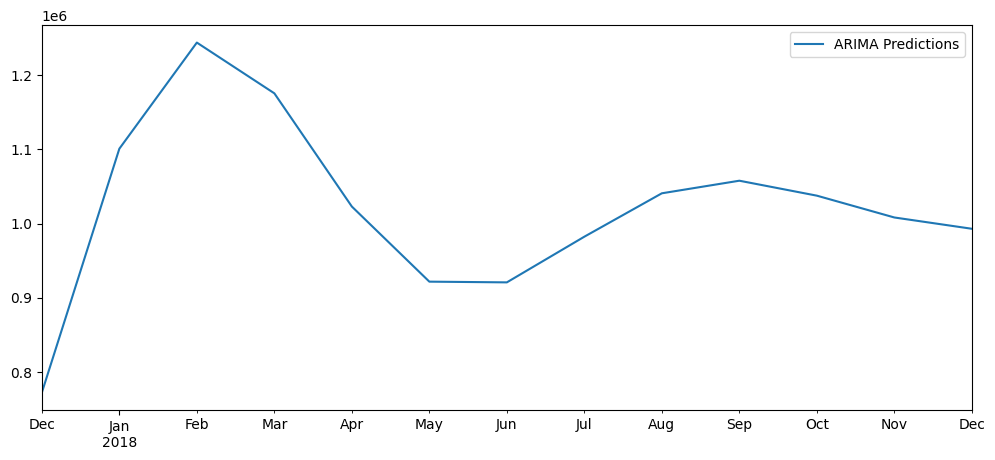

In [ ]:
pred.plot(figsize=(12,5),legend=True)
